In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 6.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
 from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Gujarat1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,15,0,0,0,-4,0,0,0,0,0,0,0
131396,2014,12,31,20,0,14,0,0,0,-4,0,0,0,0,0,0,0
131397,2014,12,31,21,0,14,0,0,0,-4,0,0,0,0,0,0,0
131398,2014,12,31,22,0,13,0,0,0,-4,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0,2000-01-01 02:00:00
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128,2000-01-01 03:00:00
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337,2000-01-01 04:00:00
5,2000,1,1,5,0,26,149,731,531,-4,140,140,713,713,0,513,513,2000-01-01 05:00:00
6,2000,1,1,6,0,29,164,796,666,-6,154,154,770,770,0,640,640,2000-01-01 06:00:00
7,2000,1,1,7,0,31,171,822,734,-6,153,153,818,818,0,714,714,2000-01-01 07:00:00
8,2000,1,1,8,0,32,170,819,729,-5,184,184,748,748,0,695,695,2000-01-01 08:00:00
9,2000,1,1,9,0,32,162,786,652,-4,147,147,786,786,0,637,637,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2014-12-27,214.8
2014-12-28,217.3
2014-12-29,216.4


In [8]:
X

,Date,GHI
0,2000-01-01 08:00:00,695
1,2000-01-01 09:00:00,637
2,2000-01-01 10:00:00,509
3,2000-01-01 11:00:00,317
4,2000-01-01 12:00:00,103
...,...,...
54745,2014-12-31 13:00:00,0
54746,2014-12-31 14:00:00,0
54747,2014-12-31 15:00:00,0
54748,2014-12-31 16:00:00,0


In [9]:
y[:4380]

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2011-12-27,215.5
2011-12-28,218.6
2011-12-29,218.8


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
type(y)

pandas.core.frame.DataFrame

In [12]:
X_T=[]
X=X.loc[:,'GHI']
X=X.values

for i in range(0,54750,10):
  X_add = X[i:i+10]
  #print(i,j)
  X_T.append(X_add)
  
X_T=np.asarray(X_T)
X_T.shape

(5475, 10)

In [13]:
X_T

array([[695, 637, 509, ...,   0,   0,   0],
       [715, 640, 502, ...,   0,   0,   0],
       [715, 641, 503, ...,   0,   0,   0],
       ...,
       [687, 620, 482, ...,   0,   0,   0],
       [688, 615, 483, ...,   0,   0,   0],
       [690, 623, 486, ...,   0,   0,   0]])

In [14]:
Y_T=y.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(5475,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(10,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
  
# fit model
model.fit(X_T[:4380], Y_T[:4380], epochs=2000, verbose=0)


In [16]:
# demonstrate prediction
yhat=[]


for i in range(4380,5475):
  x_input = X_T[i]
  x_input = x_input.reshape(1,10,1)
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[218.11078]]
[[224.01665]]
[[222.70712]]
[[219.40472]]
[[199.18471]]
[[209.10101]]
[[229.31789]]
[[231.21686]]
[[233.91914]]
[[234.31885]]
[[234.2182]]
[[235.31993]]
[[235.019]]
[[234.71896]]
[[235.72008]]
[[239.92384]]
[[244.12772]]
[[247.2306]]
[[248.03151]]
[[249.43327]]
[[251.43599]]
[[244.32921]]
[[254.24503]]
[[116.04141]]
[[257.84763]]
[[261.75217]]
[[264.546]]
[[266.64856]]
[[264.64807]]
[[267.4522]]
[[268.55154]]
[[257.6459]]
[[261.54138]]
[[265.14526]]
[[138.85706]]
[[268.84903]]
[[270.05045]]
[[265.84482]]
[[267.34683]]
[[271.0517]]
[[274.65378]]
[[280.55905]]
[[276.05545]]
[[269.75113]]
[[287.27856]]
[[286.47858]]
[[287.17535]]
[[294.88947]]
[[291.5829]]
[[297.09512]]
[[299.79565]]
[[295.79144]]
[[302.4994]]
[[304.50378]]
[[307.104]]
[[308.2069]]
[[310.7068]]
[[312.40778]]
[[313.2106]]
[[288.48434]]
[[301.7014]]
[[304.1038]]
[[306.303]]
[[305.50522]]
[[308.30322]]
[[309.90732]]
[[309.60226]]
[[314.70798]]
[[314.30774]]
[[317.3095]]
[[317.2091]]
[[323.31528]]
[[324.7162]]
[

[array([[218.11078]], dtype=float32),
 array([[224.01665]], dtype=float32),
 array([[222.70712]], dtype=float32),
 array([[219.40472]], dtype=float32),
 array([[199.18471]], dtype=float32),
 array([[209.10101]], dtype=float32),
 array([[229.31789]], dtype=float32),
 array([[231.21686]], dtype=float32),
 array([[233.91914]], dtype=float32),
 array([[234.31885]], dtype=float32),
 array([[234.2182]], dtype=float32),
 array([[235.31993]], dtype=float32),
 array([[235.019]], dtype=float32),
 array([[234.71896]], dtype=float32),
 array([[235.72008]], dtype=float32),
 array([[239.92384]], dtype=float32),
 array([[244.12772]], dtype=float32),
 array([[247.2306]], dtype=float32),
 array([[248.03151]], dtype=float32),
 array([[249.43327]], dtype=float32),
 array([[251.43599]], dtype=float32),
 array([[244.32921]], dtype=float32),
 array([[254.24503]], dtype=float32),
 array([[116.04141]], dtype=float32),
 array([[257.84763]], dtype=float32),
 array([[261.75217]], dtype=float32),
 array([[264.546

In [17]:
len(yhat)

1095

In [18]:
y[4380:].index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

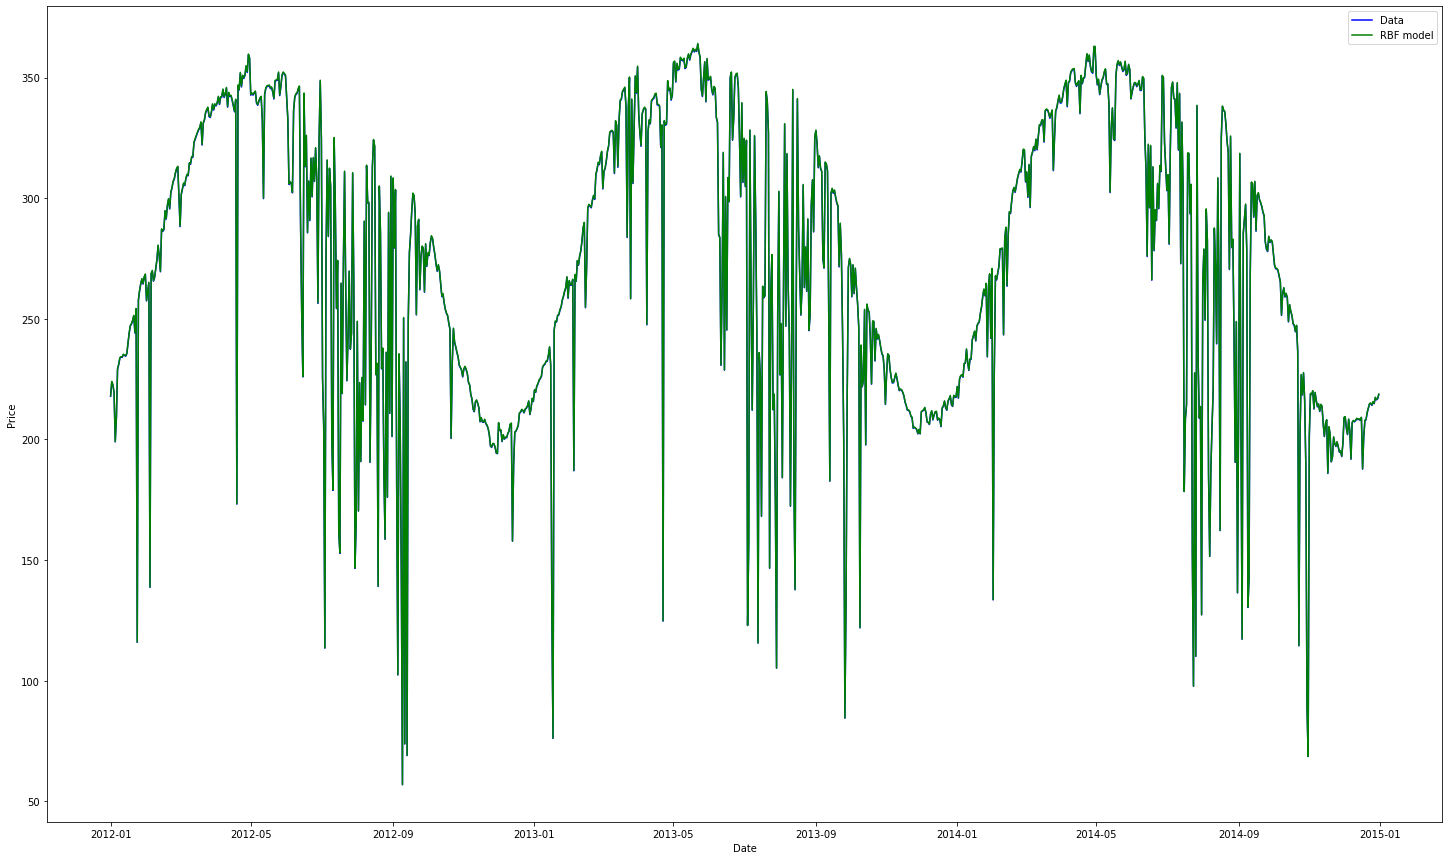

In [19]:
plt.figure(figsize = (25,15))
plt.plot(y[4380:].index, y[4380:], color= 'blue', label= 'Data')
plt.plot(y[4380:].index,np.asarray(yhat).reshape(1095,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

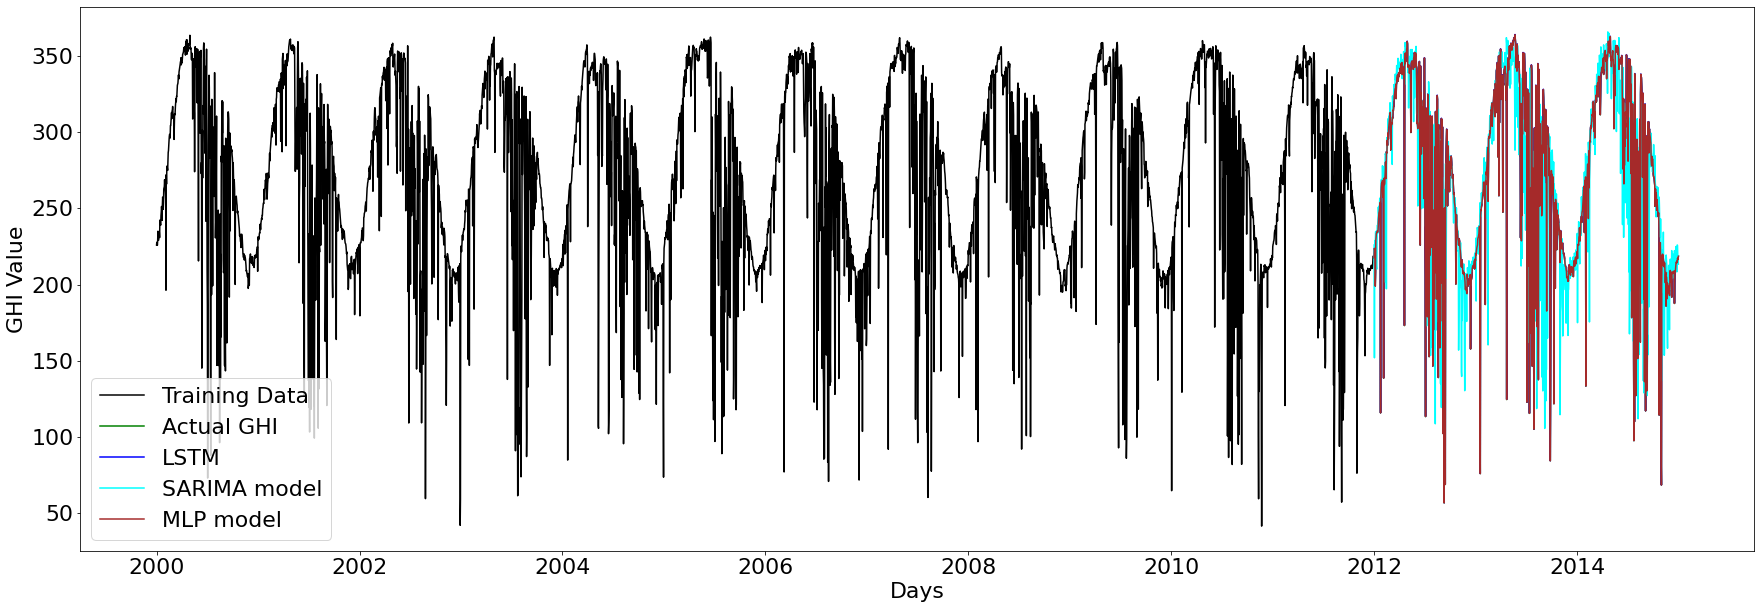

In [27]:
df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/SARIMAdaily.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/MLPdaily.csv')
plt.rcParams.update({'font.size':22})
plt.figure(figsize = (30,10))
plt.plot(y[:4380].index, y[:4380], color= 'black', label= 'Training Data')
plt.plot(y[4380:].index, y[4380:], color= 'green', label= 'Actual GHI')
plt.plot(y[4380:].index, np.asarray(yhat).reshape(1095,) , color= 'blue', label= 'LSTM')
plt.plot(y[4380:].index,df1['Prediction'] , color= 'cyan', label= 'SARIMA model') 
plt.plot(y[4380:].index, df2['GHI'], color= 'brown', label= 'MLP model')
plt.xlabel('Days')
plt.ylabel('GHI Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[4380:],np.asarray(yhat).reshape(1095,) ,squared=False)

0.04444546737613243

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y[4380:],np.asarray(yhat).reshape(1095,))

0.00015477421590603444